In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
import datetime
import os
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

now = str(datetime.datetime.now().year)+str('0'+str(datetime.datetime.now().month))[-2:]+str('0'+str(datetime.datetime.now().day))[-2:]


In [2]:
df = pd.read_csv('datasets/20250623_dataset_cleaned.csv')
df['mileage'] = df['mileage_clean']
df.drop('mileage_clean', axis=1, inplace=True)

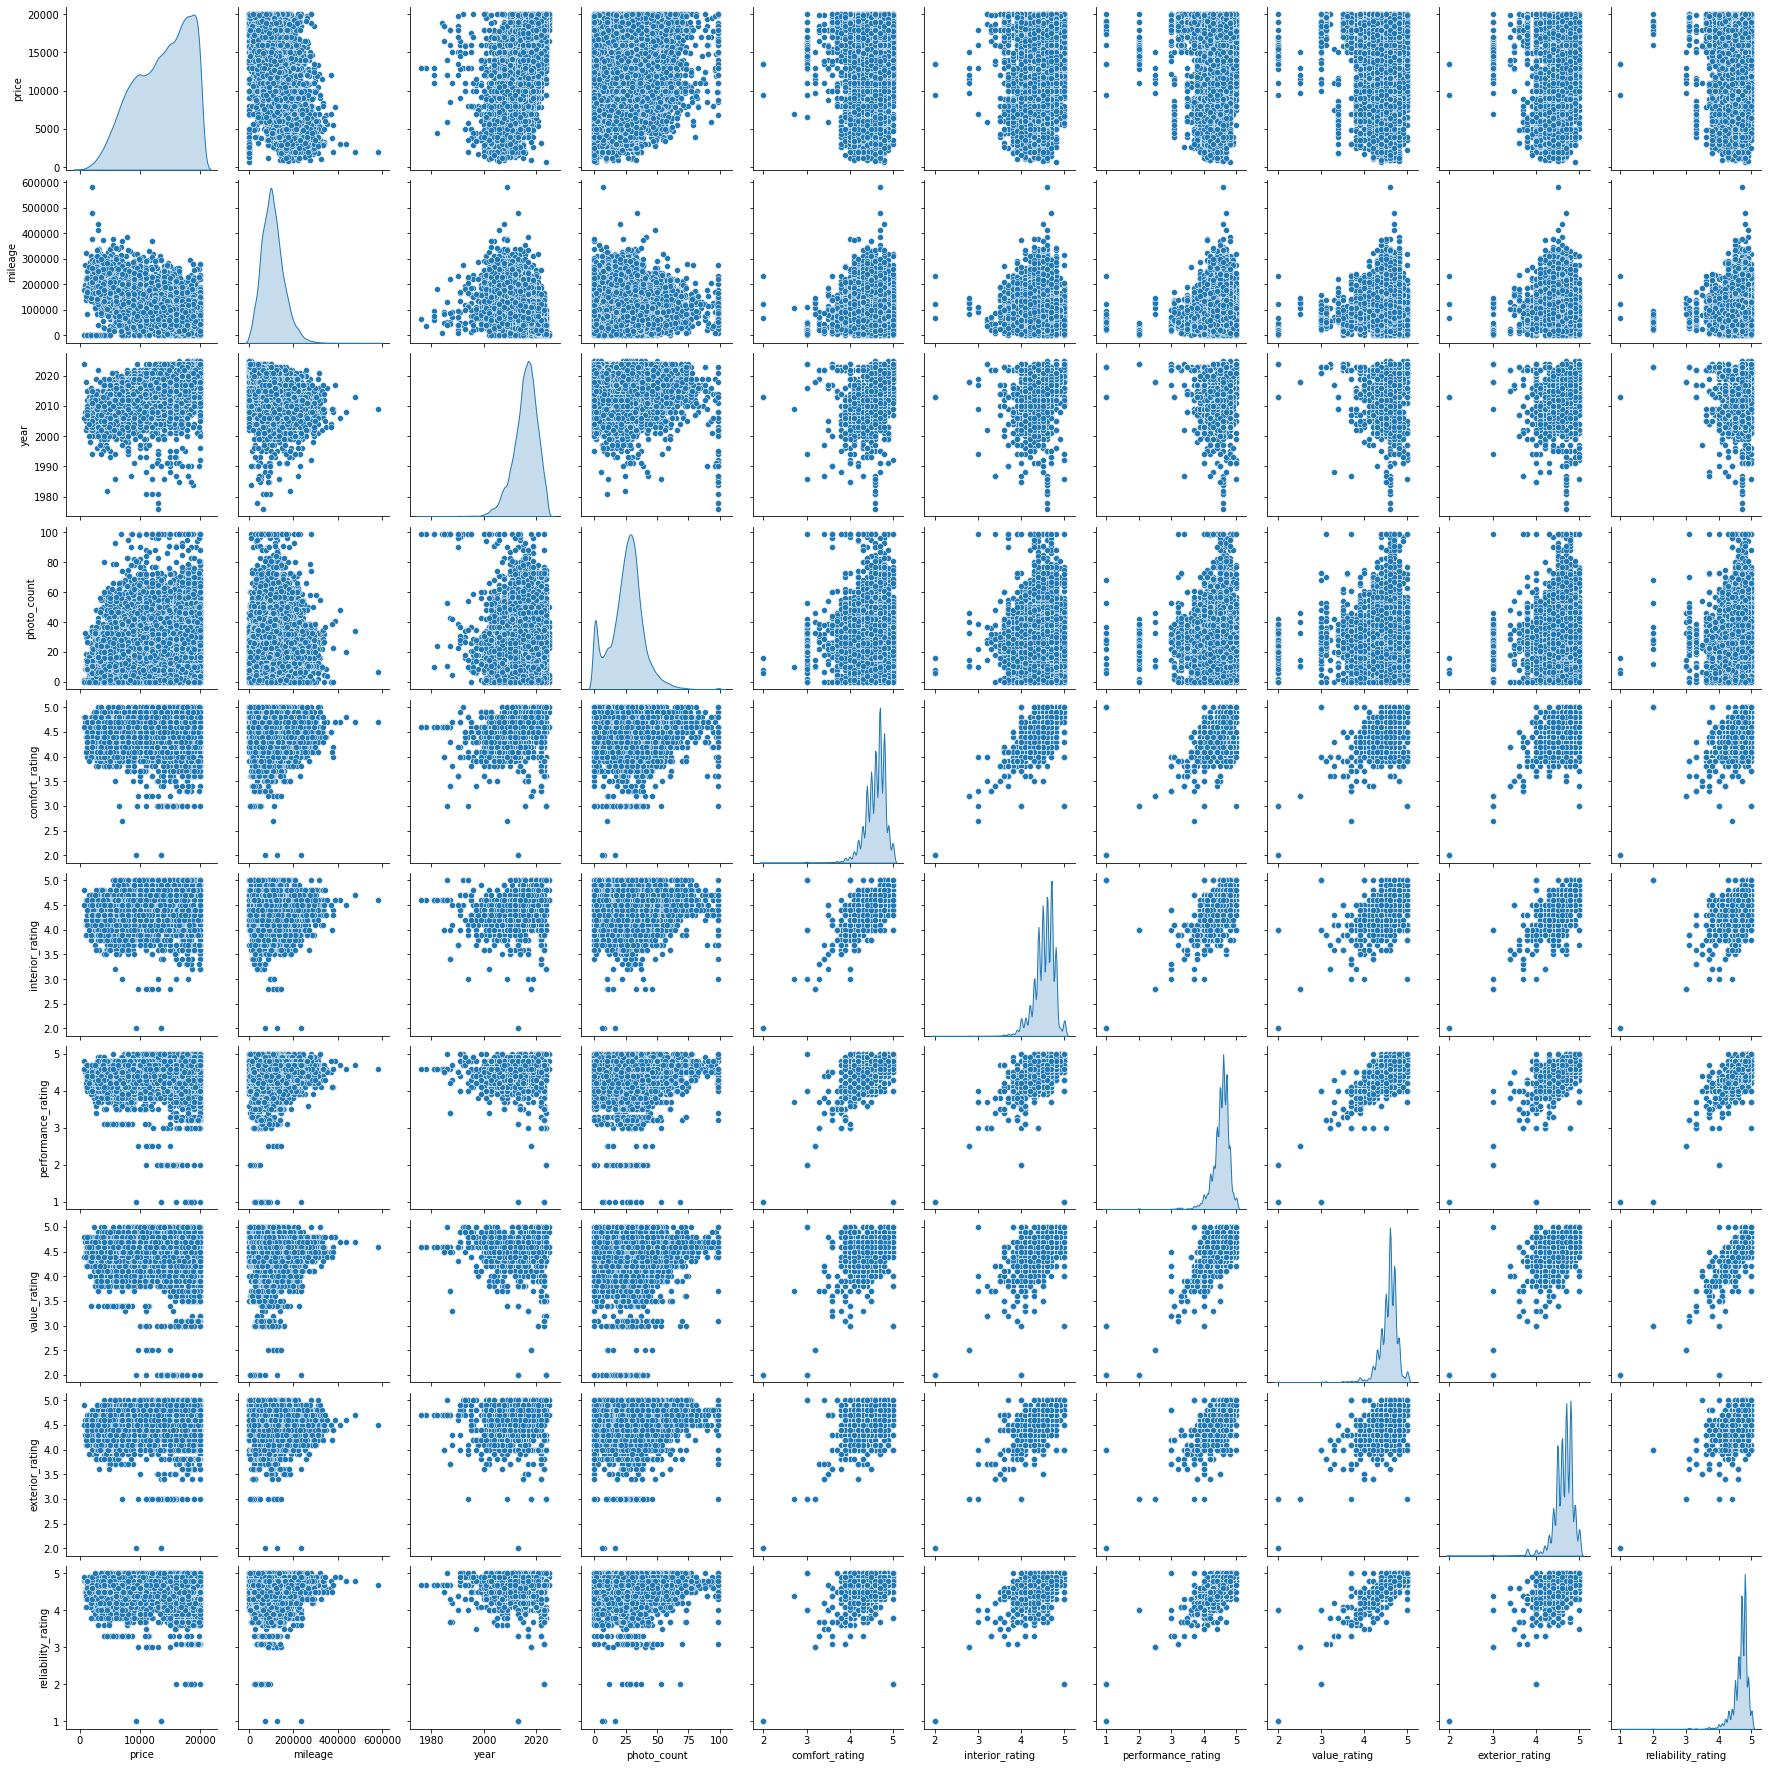

In [3]:
# pair plots of continuous variables

sns.pairplot(df[['price', 'mileage', 'year', 'photo_count', 
            'comfort_rating', 'interior_rating', 'performance_rating', 
            'value_rating', 'exterior_rating', 'reliability_rating']], diag_kind='kde')

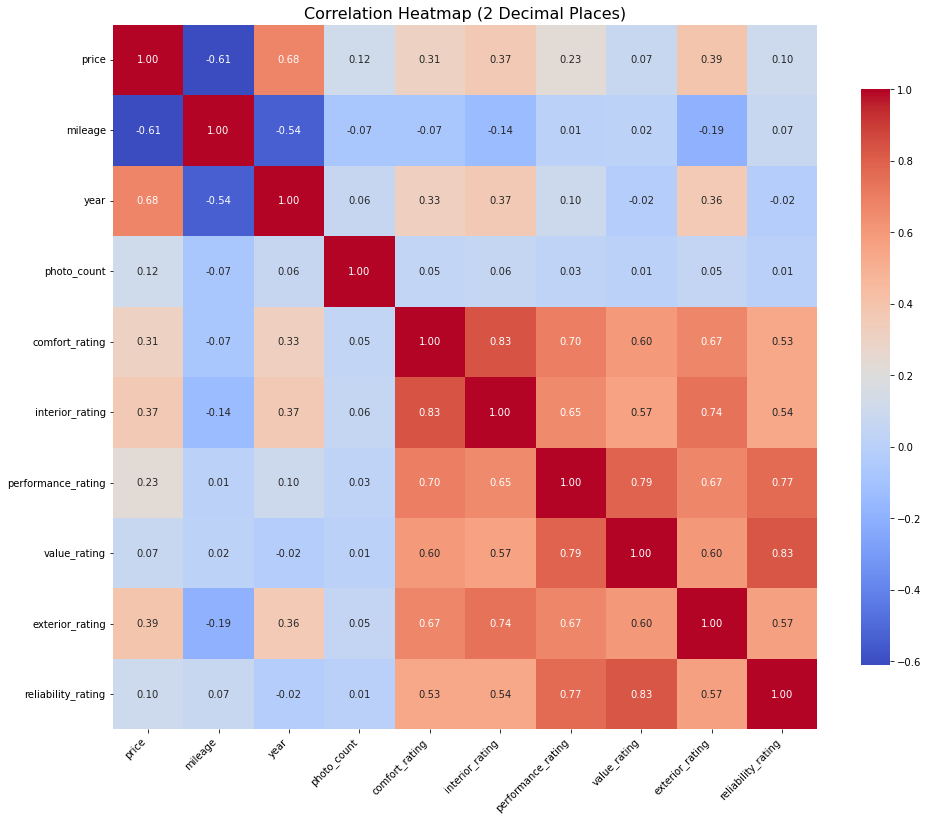

In [4]:
# coorelation map

plt.figure(figsize=(14, 12))
sns.heatmap(df[['price', 'mileage', 'year', 'photo_count', 
            'comfort_rating', 'interior_rating', 'performance_rating', 
            'value_rating', 'exterior_rating', 'reliability_rating']].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.75})

plt.title("Correlation Heatmap (2 Decimal Places)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


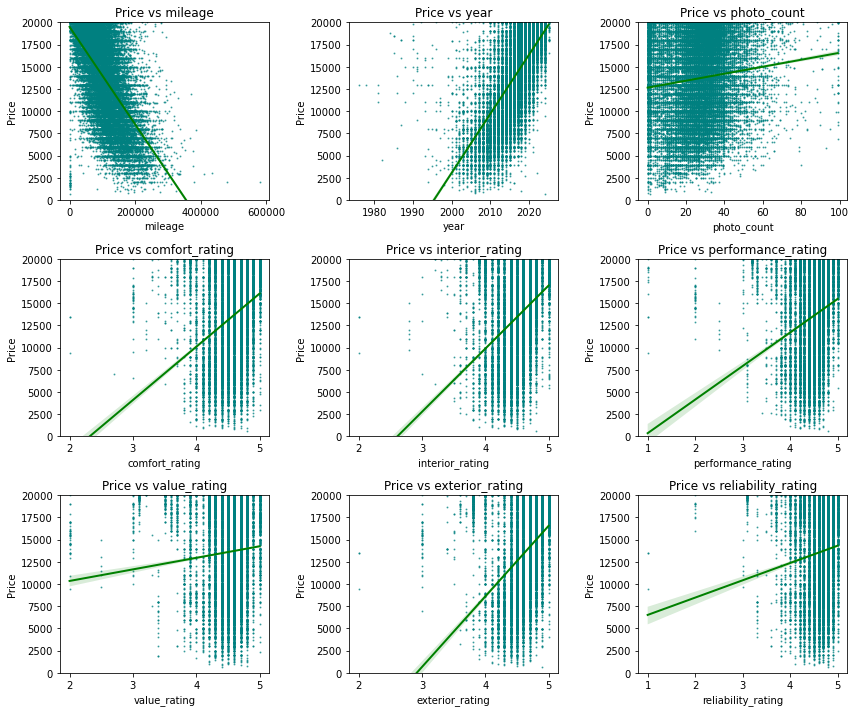

In [5]:
# price vs x plots

features = ['mileage', 'year', 'photo_count', 
            'comfort_rating', 'interior_rating', 'performance_rating', 
            'value_rating', 'exterior_rating', 'reliability_rating']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, feature in enumerate(features):
    row = i // 3
    col_idx = i % 3
    sns.regplot(x=feature, y='price', data=df, 
                scatter_kws={'s': 1, 'marker': 'x', 'color': 'teal', 'alpha': 0.6},
                line_kws={'color': 'green', 'lw': 2}, 
                ax=axes[row][col_idx])
    axes[row][col_idx].set_title(f'Price vs {feature}')
    axes[row][col_idx].set_xlabel(feature)
    axes[row][col_idx].set_ylabel('Price')
    axes[row][col_idx].set_ylim(0,20000)

plt.tight_layout()
plt.show()

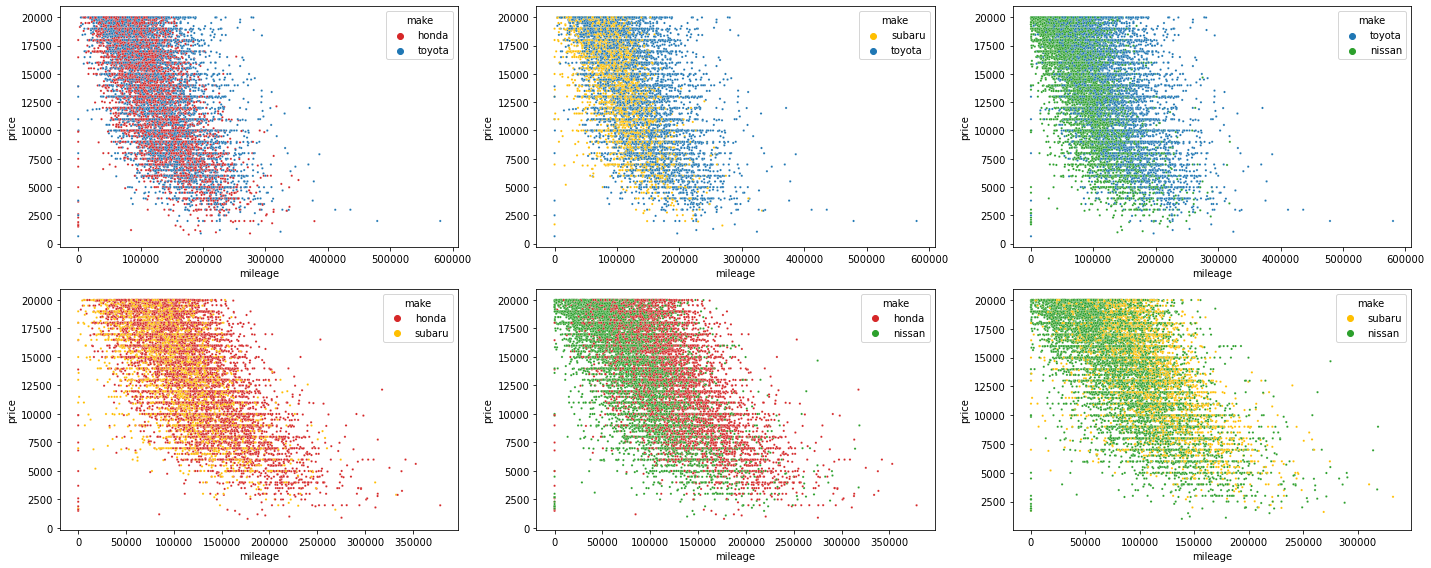

In [6]:
# mileage vs price by make 

X_ = 'mileage'
Y_ = 'price'
by_ = 'make'

custom_colors = {
    'toyota': '#1f77b4',
    'honda': '#d62728',
    'nissan': '#2ca02c',
    'subaru': '#ffbf00'
}

fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','honda'])], s=5, ax=axes[0][0], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','subaru'])], s=5, ax=axes[0][1], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','nissan'])], s=5, ax=axes[0][2], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['honda','subaru'])], s=5, ax=axes[1][0], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['honda','nissan'])], s=5, ax=axes[1][1], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['subaru','nissan'])], s=5, ax=axes[1][2], palette=custom_colors)

plt.tight_layout()
plt.show()

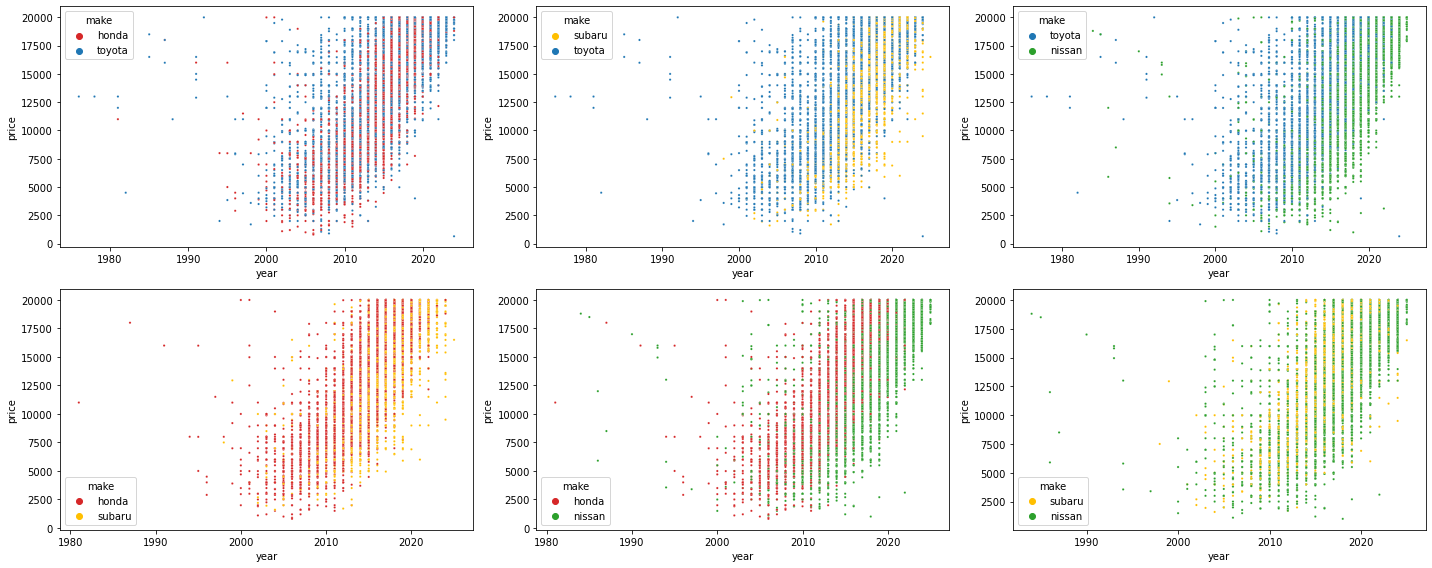

In [7]:
# year vs price by make 

X_ = 'year'
Y_ = 'price'
by_ = 'make'

custom_colors = {
    'toyota': '#1f77b4',
    'honda': '#d62728',
    'nissan': '#2ca02c',
    'subaru': '#ffbf00'
}

fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','honda'])], s=5, ax=axes[0][0], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','subaru'])], s=5, ax=axes[0][1], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['toyota','nissan'])], s=5, ax=axes[0][2], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['honda','subaru'])], s=5, ax=axes[1][0], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['honda','nissan'])], s=5, ax=axes[1][1], palette=custom_colors)
sns.scatterplot(x=X_, y=Y_, hue=by_, data=df[df[by_].isin(['subaru','nissan'])], s=5, ax=axes[1][2], palette=custom_colors)

plt.tight_layout()
plt.show()

C:\Users\woodr\AppData\Local\Temp\ipykernel_22904\3751723621.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


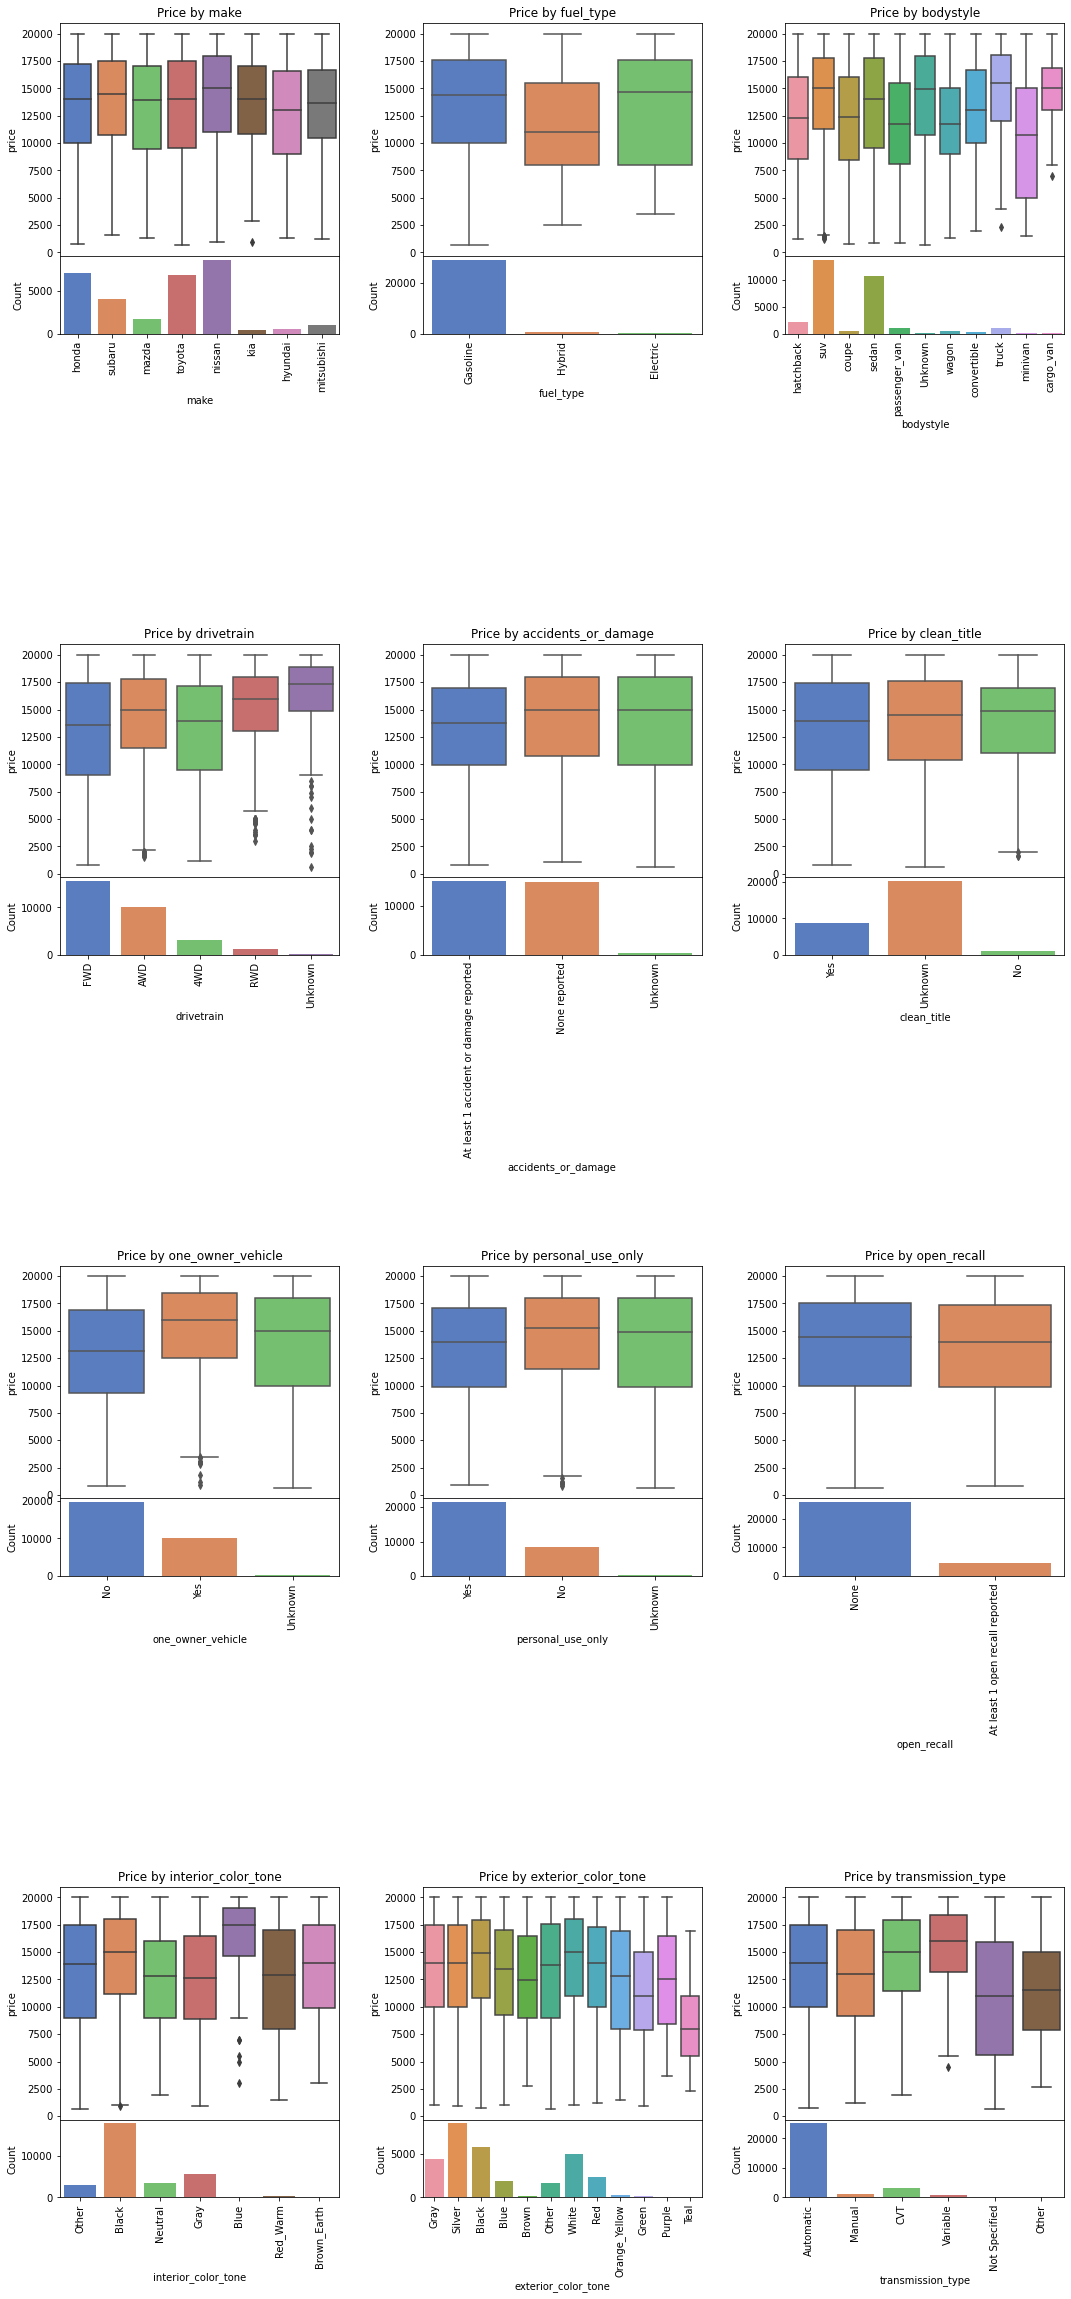

In [8]:
sns.set_palette("muted")

cat_cols = ['make', 'fuel_type', 
                 'bodystyle', 'drivetrain', 'accidents_or_damage', 'clean_title', 
                 'one_owner_vehicle', 'personal_use_only', 'open_recall', 'interior_color_tone', 
                 'exterior_color_tone', 'transmission_type']

fig = plt.figure(figsize=(18, 40))
outer = gridspec.GridSpec(4, 3, wspace=0.3, hspace=1)

for i, col in enumerate(cat_cols):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], height_ratios=[3, 1], hspace=0)
    
    ax_box = plt.Subplot(fig, inner[0])
    sns.boxplot(x=col, y='price', data=df, ax=ax_box)
    ax_box.set_xticklabels([])
    ax_box.set_xlabel('')
    ax_box.set_title(f'Price by {col}')
    fig.add_subplot(ax_box)
    
    ax_count = plt.Subplot(fig, inner[1])
    sns.countplot(x=col, data=df, ax=ax_count)
    ax_count.set_xticklabels(ax_count.get_xticklabels(), rotation=90)
    ax_count.set_ylabel('Count')
    fig.add_subplot(ax_count)

plt.tight_layout()
plt.show()
